In [21]:
# 运行此段做数据准备
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../images/sakura.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 对灰度图像进行高斯模糊，以减少噪声
blur = cv2.GaussianBlur(gray, (5, 5), 0)

(-0.5, 1079.5, 601.5, -0.5)

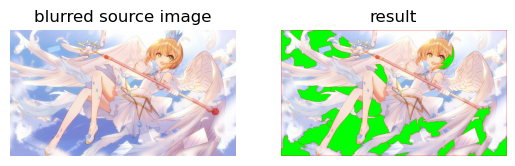

In [22]:
#确定前景和背景
ret1, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 形态学操作，去除噪声，通过开运算消除孤立较小前景
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=4)

# 确定背景区域，膨胀（Dilation）扩张前景区域
sure_bg = cv2.dilate(opening, kernel, iterations=2)

# 寻找未知区域，判断依据为与背景间距离
dist_transform = cv2.distanceTransform(sure_bg, cv2.DIST_L2, 5)
ret2, sure_fg = cv2.threshold(dist_transform, 0.3 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# 标记分水岭区域
ret3, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
# 将未知区域标签设置为0
markers = np.where(unknown == 255, 0, markers)


# 应用分水岭算法
cv2.watershed(img, markers)
result = img.copy()

# 边界标记为红色[0, 0, 255], 非主要分类标记为绿色[0, 255, 0]
result[markers == -1] = [0, 0, 255]  
result[markers > 1] = [0, 255, 0]

# 这副图像背景较亮，人体存在阴影部分，基于像素值的操作较难分割图像
figures = plt.figure()
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('blurred source image')
plt.axis('off')
plt.subplot(122)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('result')
plt.axis('off')